In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Load the dataset
df = pd.read_csv('tips.csv')

In [3]:
# 2. Define Day Type (Categorizing for Stability Analysis)
# Thursday and Friday are Weekdays; Saturday and Sunday are Weekends
df['day_type'] = df['day'].apply(lambda x: 'Weekday' if x in ['Thur', 'Fri'] else 'Weekend')

In [4]:
# 3. Create Visualizations
plt.figure(figsize=(18, 6))
sns.set_theme(style="whitegrid")

<Figure size 1800x600 with 0 Axes>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26260\1781794455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day_type', y='total_bill', palette='Set2')


Text(0, 0.5, 'Total Bill ($)')

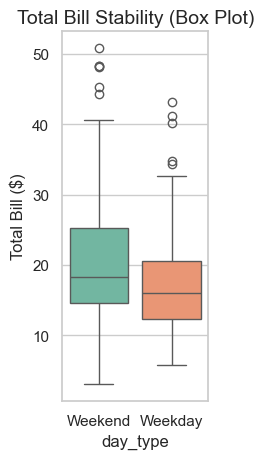

In [5]:
# CHART 1: Box Plot (Volatility & Outliers)
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='day_type', y='total_bill', palette='Set2')
plt.title('Total Bill Stability (Box Plot)', fontsize=14)
plt.ylabel('Total Bill ($)')

Text(0.5, 0, 'Total Bill ($)')

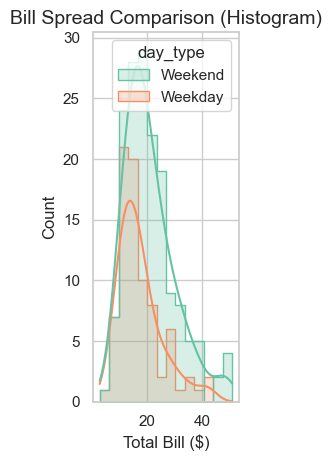

In [6]:
# CHART 2: Histogram (Distribution & Predictability)
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='total_bill', hue='day_type', kde=True, element="step", palette='Set2')
plt.title('Bill Spread Comparison (Histogram)', fontsize=14)
plt.xlabel('Total Bill ($)')

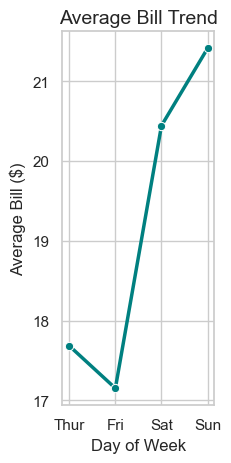

In [7]:
# CHART 3: Line Graph (Average Trend)
day_order = ['Thur', 'Fri', 'Sat', 'Sun']
avg_bill_by_day = df.groupby('day')['total_bill'].mean().reindex(day_order).reset_index()

plt.subplot(1, 3, 3)
sns.lineplot(data=avg_bill_by_day, x='day', y='total_bill', marker='o', color='teal', linewidth=2.5)
plt.title('Average Bill Trend', fontsize=14)
plt.ylabel('Average Bill ($)')
plt.xlabel('Day of Week')

plt.tight_layout()
plt.savefig('revenue_stability_analysis.png')
plt.show()

In [8]:
# 4. Stability Metrics for Management (Coefficient of Variation)
stability_report = df.groupby('day_type')['total_bill'].agg(['mean', 'std', 'count'])
stability_report['Volatility (CV)'] = stability_report['std'] / stability_report['mean']
print("--- REVENUE STABILITY REPORT ---")
print(stability_report.round(4))

--- REVENUE STABILITY REPORT ---
             mean     std  count  Volatility (CV)
day_type                                         
Weekday   17.5581  7.9362     81           0.4520
Weekend   20.8930  9.1685    163           0.4388
